# Analysis of Mobile Price Data 

Mobile Price Data contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [1]:
#importing all the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
#Reading the dataset
data = pd.read_csv('Mobile_Price_Data.csv')

In [3]:
#Displaying first five rows of the dataset
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0         7.0    0.6   
1           1021     1          0.5         1   0       1        53.0    0.7   
2            563     1          0.5         1   2       1        41.0    0.9   
3            615     1          2.5         0   0       0        10.0    0.8   
4           1821     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0        188        2  ...         20     756.0  2549.0     9     7   
1        136        3  ...        905    1988.0  2631.0    17     3   
2        145        5  ...       1263    1716.0  2603.0    11     2   
3        131        6  ...       1216    1786.0  2769.0    16     8   
4        141        2  ...       1208    1212.0  1411.0     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19      0.0             0     1            1  
1          7      1.0             1     0            2  
2          9      1.0             1     0            2  
3         11      1.0             0     0            2  
4         15      1.0             1     0            1  

[5 rows x 21 columns]

In [4]:
# prints information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [5]:
# Displays the last five rows from the dataset
data.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[5 rows x 21 columns]

In [6]:
# Gives the statistical details
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  1999.000000  1999.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.035018     0.501601   140.249000     4.520500  ...   
std       0.499662    18.142986     0.288411    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  1999.000000  1999.000000  2000.000000  2000.000000   
mean    645.108000  1251.566783  2124.218609    12.306500     5.767000   
std     443.780811   432.301505  1085.003435     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.500000  1207.000000     9.000000     2.000000   
50%     564.000000  1247.000000  2147.000000    12.000000     5.000000   
75%     947.250000  1633.000000  3065.000000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  1999.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761381      0.503000     0.507000     1.500000  
std       5.463955     0.426346      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [7]:
#Gives total rows and columns 
data.shape

(2000, 21)

In [8]:
#Checking for missing values in the dataset
data.isnull().values.any() 

True

In [9]:
#Gives the sum of null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### There are 5 rows with missing values
####  int_memory, m_dep, px_width, ram and three_g 
#### int_memory, m_dep, px_width, ram are non-categorical variables, so we replace them with mean values
#### three_g is a categorical variable so we'll drop it

#### Replacing missing entries from int_memory, m_dep, px_width, ram with with mean 

In [10]:
# gives statistical information for int_memory 
data['int_memory'].describe()

count    1999.000000
mean       32.035018
std        18.142986
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

In [11]:
#gives info where null value is present in int_memory
data[data['int_memory'].isna()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
63           1720     0          2.0         0  15       1         NaN    0.5   

    mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
63        168        2  ...        753    1353.0  2148.0    14     2   

    talk_time  three_g  touch_screen  wifi  price_range  
63          5      1.0             1     1            2  

[1 rows x 21 columns]

In [12]:
# creating new dataframe
clean_data = data
clean_data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6        188        2  ...         20     756.0  2549.0     9     7   
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19      0.0             0     1            1  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[2000 rows x 21 columns]

In [13]:
# Replacing missing value of int_memory with mean of int_memory
clean_data['int_memory'] = data['int_memory'].fillna(value=data['int_memory'].mean())

In [14]:
#gives info where null value is present in ram
data[data['ram'].isna()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
36            589     1          2.3         1   1       0        61.0    0.6   

    mobile_wt  n_cores  ...  px_height  px_width  ram  sc_h  sc_w  talk_time  \
36        160        4  ...        429     815.0  NaN    13     7          2   

    three_g  touch_screen  wifi  price_range  
36      1.0             0     1            1  

[1 rows x 21 columns]

In [15]:
# gives statistical information for ram
data['ram'].describe()

count    1999.000000
mean     2124.218609
std      1085.003435
min       256.000000
25%      1207.000000
50%      2147.000000
75%      3065.000000
max      3998.000000
Name: ram, dtype: float64

In [16]:
# Replacing missing value of ram with mean of ram
clean_data['ram'] = data['ram'].fillna(value=data['ram'].mean())

In [17]:
#gives info where null value is present in m_dep
data[data['m_dep'].isna()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
20            772     0          1.1         1  12       0        39.0    NaN   

    mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
20         81        7  ...       1314    1854.0  2819.0    17    15   

    talk_time  three_g  touch_screen  wifi  price_range  
20          3      1.0             1     0            3  

[1 rows x 21 columns]

In [18]:
# gives statistical information for m_dep
data['m_dep'].describe()

count    1999.000000
mean        0.501601
std         0.288411
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [19]:
# Replacing missing value of m_dep with mean of m_dep
clean_data['m_dep'] = data['m_dep'].fillna(value=data['m_dep'].mean())

In [20]:
#gives info where null value is present in px_width
data[data['px_width'].isna()]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
7           1954     0          0.5         1   0       0        24.0    0.8   

   mobile_wt  n_cores  ...  px_height  px_width    ram  sc_h  sc_w  talk_time  \
7        187        4  ...        512       NaN  700.0    16     3          5   

   three_g  touch_screen  wifi  price_range  
7      1.0             1     1            0  

[1 rows x 21 columns]

In [21]:
# gives statistical information for px_width
data['px_width'].describe()

count    1999.000000
mean     1251.566783
std       432.301505
min       500.000000
25%       874.500000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

In [22]:
# Replacing missing value of px_width with mean of px_width
clean_data['px_width'] = data['px_width'].fillna(value=data['px_width'].mean())

In [23]:
clean_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
clean_data.dropna(axis=0, inplace= True)
print('The length after removing NA is ', len(clean_data))
#dimensions of dataset   
rows, col = clean_data.shape
print ("Dimensions of dataset: {}" . format (clean_data.shape))
print ('Rows:', rows,'\nColumns:', col)

The length after removing NA is  1999
Dimensions of dataset: (1999, 21)
Rows: 1999 
Columns: 21


#### Now the dataset does not contain any missing values. Once missing value treatment is done we will proceed to outlier detection.
#### Boxplot is the common way to detect outliers.

In [25]:
# Separate numerical and categorical features into different lists
numerical_columns = list(clean_data.loc[:,['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])
categorical_columns = list(clean_data.loc[:,['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']])

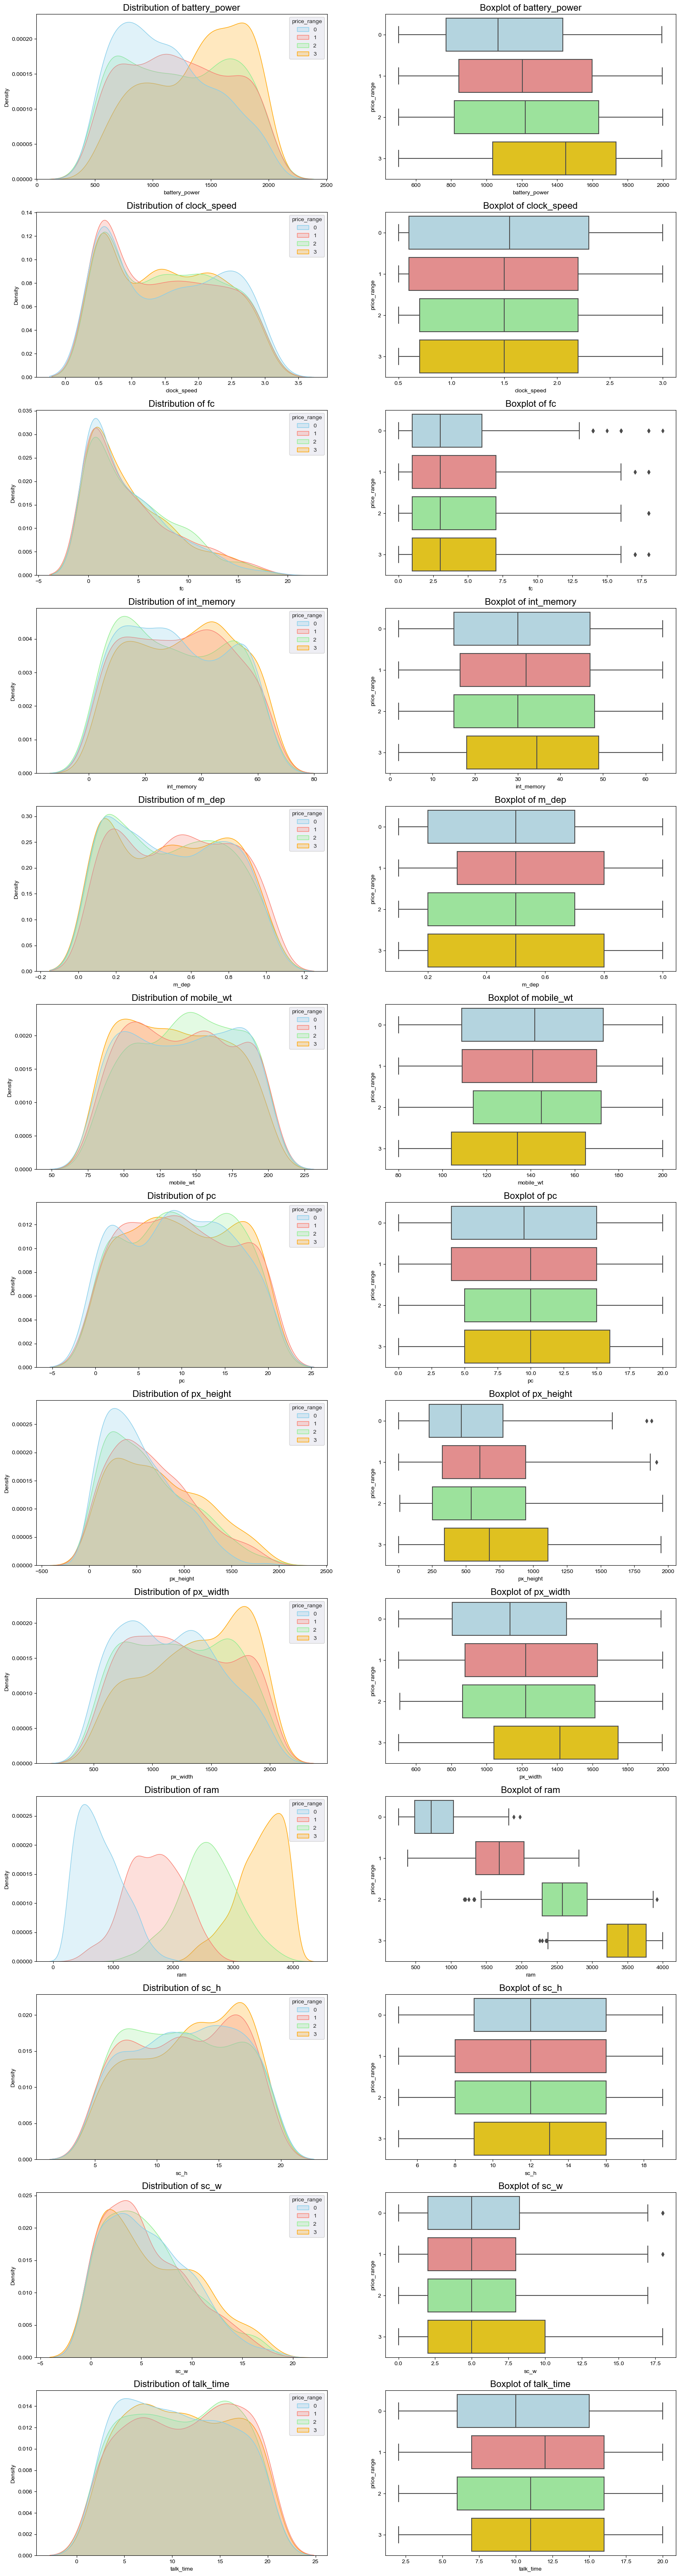

In [26]:
# Define colors for KDE plots and boxplots
kde_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']
box_palette = ['lightblue', 'lightcoral', 'lightgreen', 'gold']

# Create subplots
fig, axes = plt.subplots(13, 2, figsize=(20, 80))

# Set style
sns.set_style('darkgrid')

# Initialize index for subplot rows
idx = 0

# Iterate over numerical columns
for col in numerical_columns:
    # KDE plot
    sns.kdeplot(data=clean_data, x=col, hue='price_range', palette=kde_palette,
                fill=True, ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    
    # Boxplot
    sns.boxplot(data=clean_data, x=col, y='price_range', palette=box_palette, orient='h',
                ax=axes[idx][1]).set_title(f'Boxplot of {col}', fontsize='16')
    
    # Increment index
    idx += 1

# Show plot
plt.show()


#### This code is used to visualize the distribution of numerical features and their relationship with the target variable ('price_range') in a dataset

<Axes: >

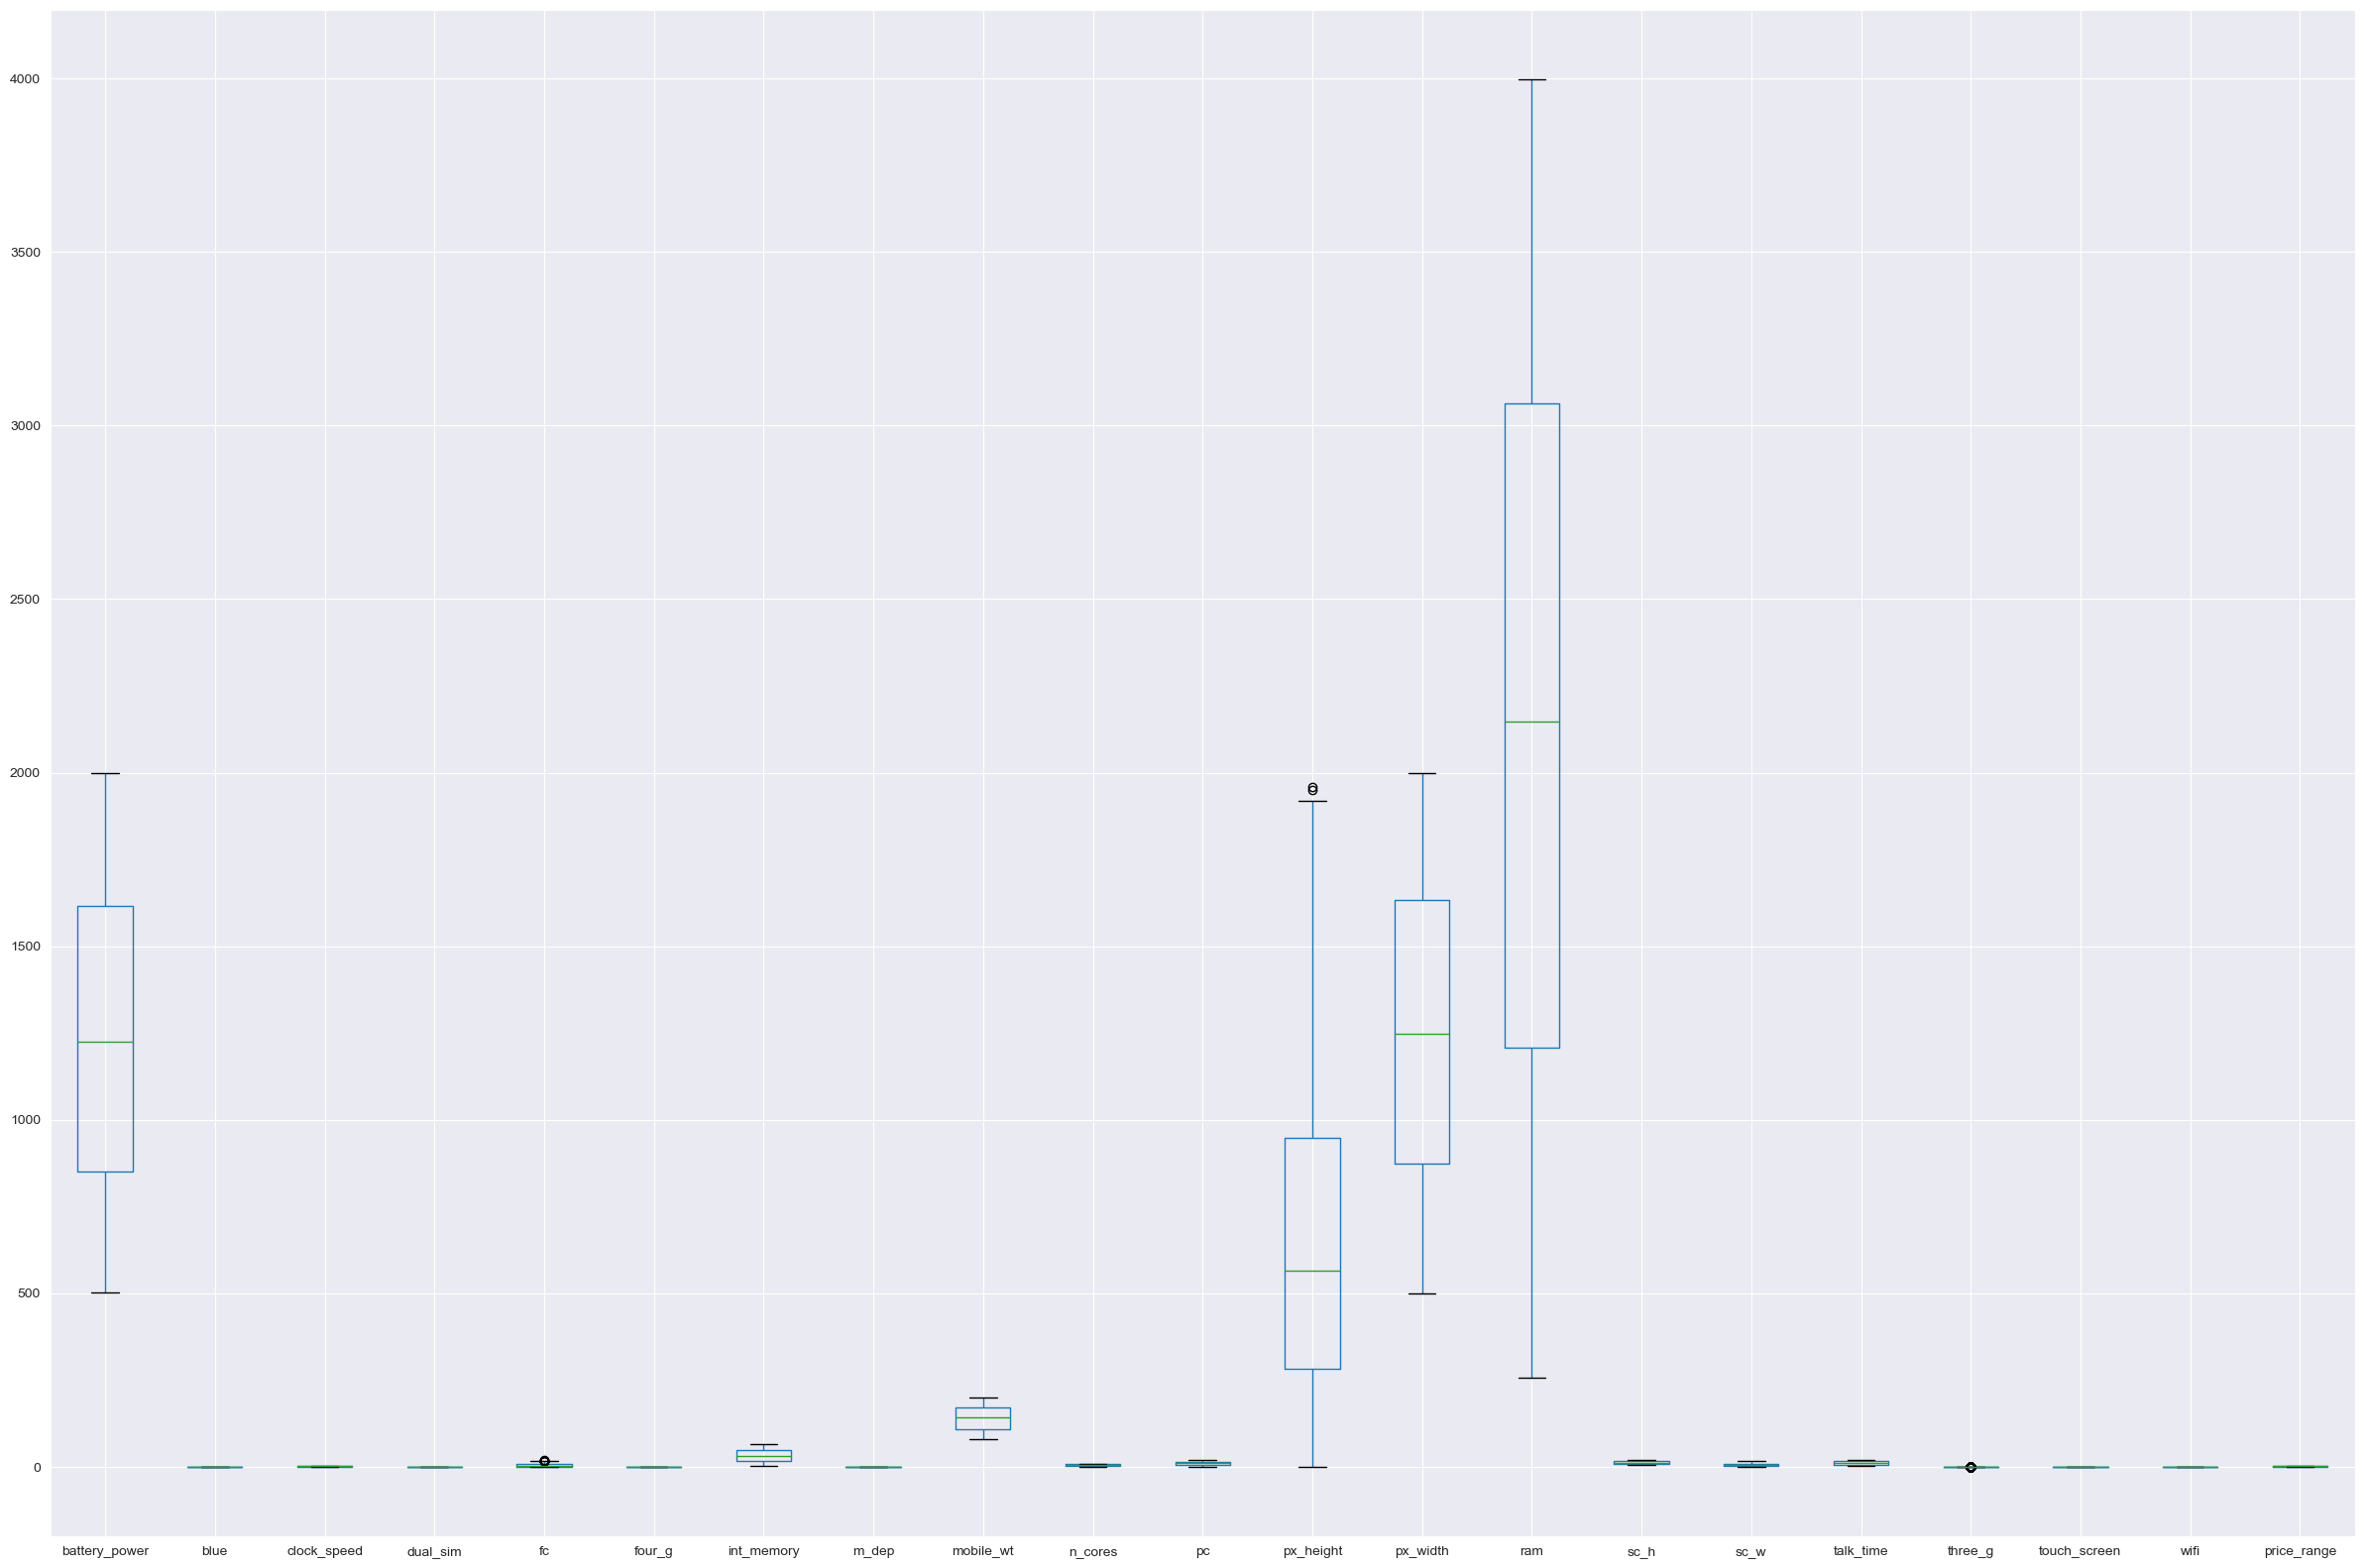

In [27]:
# Plot boxplot to check for outliers
plt.figure(figsize=(30,20))
clean_data.boxplot()

#### The boxplots in the table above indicate the presence of outliers in the fc, px_height and three_g

Now let us consider fc for our outlier analysis

<Axes: >

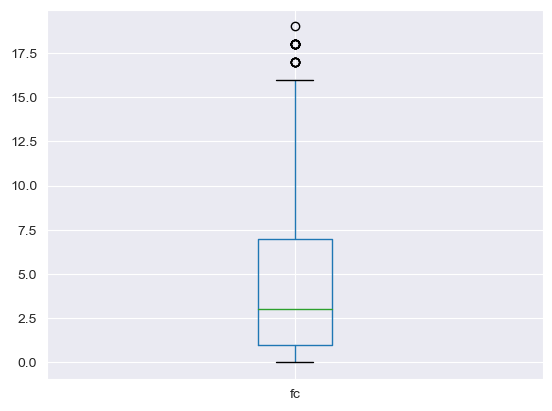

In [28]:
#plotting boxplot for fc
clean_data.boxplot(column='fc')

In [29]:
#describing statistical features of fc
clean_data['fc'].describe()

count    1999.000000
mean        4.311156
std         4.341899
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [30]:
# assigning median of fc to median_fc
median_fc = data['fc'].median()
median_fc

3.0

In [31]:
clean_data['fc'] - median_fc

0       -2.0
1       -3.0
2       -1.0
3       -3.0
4       10.0
        ... 
1995    -3.0
1996    -3.0
1997    -2.0
1998     1.0
1999     2.0
Name: fc, Length: 1999, dtype: float64

In [32]:
#Calculate the Median Absolute Deviation (MAD)
mad_fc = (clean_data['fc'] - median_fc).abs().median()
mad_fc

3.0

In [33]:
# Defining a threshold
threshold = 4  # Adjust as needed

# Identify outliers
outliers = clean_data[(clean_data['fc'] - median_fc).abs() > threshold * mad_fc]
outliers

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
31             1568     1          0.5         0  16       0        33.0   
35              725     0          1.3         1  16       0        60.0   
38              790     0          2.0         1  16       1        11.0   
95             1137     1          1.0         0  18       0         7.0   
157            1224     0          0.5         0  16       1         6.0   
169            1569     0          2.8         1  17       0        44.0   
206            1642     0          0.5         1  16       1         8.0   
226            1708     1          2.4         1  18       1        49.0   
229            1689     0          1.8         0  17       0        24.0   
288            1191     0          1.3         1  16       1        26.0   
300            1937     1          1.7         0  17       0        58.0   
302             768     1          0.9         0  16       1        56.0   
305            1348     0          2.0         0  18       0        52.0   
351            1557     0          2.8         1  16       0         2.0   
372            1703     1          1.5         1  17       1        55.0   
401            1042     0          2.7         1  16       1        50.0   
501            1773     1          2.5         0  16       1        32.0   
545             767     0          1.9         0  16       1        19.0   
564             574     0          2.8         1  16       0        38.0   
584             946     1          2.6         1  17       0         5.0   
745             894     0          2.1         1  16       0        16.0   
771             550     1          0.5         0  16       1        23.0   
1007           1963     1          1.0         0  16       1        34.0   
1062            587     1          2.5         0  16       1        51.0   
1196           1735     0          1.8         1  16       0        34.0   
1387           1533     1          1.1         1  18       1        17.0   
1406           1731     1          2.3         1  18       0        60.0   
1416           1448     0          0.5         1  18       0         2.0   
1447           1002     0          2.7         1  16       1        11.0   
1456           1404     0          2.1         0  16       0        44.0   
1549           1772     1          1.6         0  17       1        45.0   
1554           1957     0          1.2         1  18       1        36.0   
1594            586     1          0.6         0  16       1        42.0   
1640           1269     1          2.8         1  16       0        41.0   
1665           1003     1          2.9         0  16       1        16.0   
1693            695     0          0.5         0  18       1        12.0   
1705           1290     1          1.4         1  19       1        35.0   
1707           1699     1          0.5         0  16       0        21.0   
1788           1424     0          0.5         1  16       1        23.0   
1880           1720     0          1.6         0  18       1         2.0   
1882            591     0          2.1         1  18       1        16.0   
1888           1544     0          2.4         0  18       1        12.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
31      1.0        150        8  ...        413     654.0   508.0     5     1   
35      0.4        160        8  ...       1134    1249.0  1326.0    10     4   
38      0.3         87        6  ...        347     730.0  3169.0     6     1   
95      1.0        196        3  ...        942    1179.0  3616.0    13     5   
157     0.4        109        6  ...        747     826.0   506.0    10     0   
169     0.3        110        4  ...         45    1942.0  1260.0     9     2   
206     0.3        171        6  ...        129     873.0  2984.0    13     4   
226     0.1        109        1  ...        233     517.0  3388.0     6     4   
229     

In [34]:
# Step 5: Remove outliers
clean_df= clean_data[(clean_data['fc'] - median_fc).abs() <= threshold * mad_fc]
clean_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6        188        2  ...         20     756.0  2549.0     9     7   
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19      0.0             0     1            1  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[1957 rows x 21 columns]

In [35]:
# Print information about the outliers
print("Number of outliers:", len(outliers))
print("Median fc:", median_fc)
print("MAD of fc:", mad_fc)
print("Threshold is:", threshold)

# Optionally, you can print the descriptive statistics of the cleaned data
print("\nDescriptive statistics of cleaned data:")
print(clean_df['fc'].describe())

Number of outliers: 42
Median fc: 3.0
MAD of fc: 3.0
Threshold is: 4

Descriptive statistics of cleaned data:
count    1957.000000
mean        4.044456
std         3.981368
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        15.000000
Name: fc, dtype: float64


<Axes: >

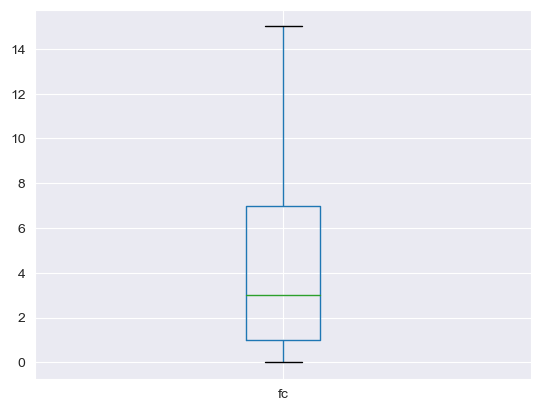

In [36]:
clean_df.boxplot(column='fc')

#### This is cleaned Front Camera mega pixels after removing outliers

#### Next we need to check for px_height

<Axes: >

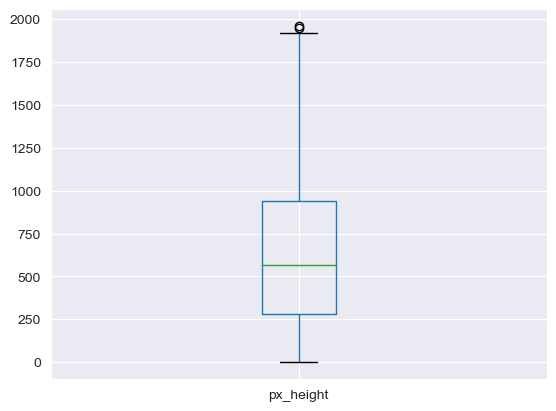

In [37]:
#plotting boxplot for px_height
clean_df.boxplot(column='px_height')

In [38]:
#describing statistical features for px_height
clean_df.px_height.describe()

count    1957.000000
mean      642.713848
std       441.723519
min         0.000000
25%       282.000000
50%       564.000000
75%       942.000000
max      1960.000000
Name: px_height, dtype: float64

In [39]:
#assigning median of px_height to meadian_px_height
median_px_height = data['px_height'].median()
median_px_height

564.0

In [40]:
#Calculate the Median Absolute Deviation (MAD)
mad_px_height = (clean_data['px_height'] - median_px_height).abs().median()
mad_px_height

318.0

In [41]:
# Step 3: Define a threshold
threshold = 4  # Adjust as needed

# Step 4: Identify outliers
outliers = clean_df[(clean_df['px_height'] - median_px_height).abs() > threshold * mad_px_height]
outliers

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
148            1216     0          3.0         0   4       0        47.0   
260             754     0          0.5         1   7       1        59.0   
274             793     0          1.0         1   5       1        30.0   
873             603     1          0.7         1   0       1        64.0   
894            1497     1          0.7         0   5       0        32.0   
988            1413     1          0.5         1   4       1        45.0   
1017           1221     0          0.5         0   1       1        28.0   
1163           1930     1          2.0         0  11       0        16.0   
1397            717     0          1.1         1   2       1        14.0   
1615           1086     0          2.7         0   0       1        24.0   
1771           1230     1          1.6         0   0       1        48.0   
1827           1692     0          2.1         0   4       1         2.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
148     0.4        199        3  ...       1852    1967.0  2268.0    13     5   
260     0.7        178        7  ...       1914    1928.0  1027.0     6     3   
274     0.9        133        2  ...       1858    1935.0  2332.0    17    13   
873     0.2        156        6  ...       1842    1968.0   604.0    10     4   
894     0.7         92        3  ...       1920    1933.0  1329.0     6     1   
988     0.4        104        5  ...       1949    1994.0  2973.0    17     8   
1017    0.5        139        1  ...       1895    1976.0  2438.0    13    11   
1163    0.8        186        8  ...       1901    1920.0  1783.0    17     3   
1397    0.1         99        8  ...       1878    1981.0   629.0    16    15   
1615    0.1        135        8  ...       1874    1976.0  3930.0    17     1   
1771    0.7        111        7  ...       1960    1963.0  1622.0    18    17   
1827    0.9        106        1  ...       1899    1904.0  3779.0     9     3   

      talk_time  three_g  touch_screen  wifi  price_range  
148           4      0.0             1     1            2  
260           5      1.0             0     0            1  
274          14      1.0             1     1            2  
873           8      1.0             1     1            0  
894           7      1.0             1     0            2  
988          15      1.0             0     1            3  
1017         10      1.0             1     1            3  
1163         13      0.0             0     1            2  
1397         20      1.0             0     0            0  
1615         18      1.0             1     1            3  
1771         16      1.0             1     1            2  
1827          7      1.0             1     1            3  

[12 rows x 21 columns]

In [42]:
# Step 5: Remove outliers
clean_df = clean_df[(clean_df['px_height'] - median_px_height).abs() <= threshold * mad_px_height]
clean_df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6        188        2  ...         20     756.0  2549.0     9     7   
1       0.7        136        3  ...        905    1988.0  2631.0    17     3   
2       0.9        145        5  ...       1263    1716.0  2603.0    11     2   
3       0.8        131        6  ...       1216    1786.0  2769.0    16     8   
4       0.6        141        2  ...       1208    1212.0  1411.0     8     2   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.8        106        6  ...       1222    1890.0   668.0    13     4   
1996    0.2        187        4  ...        915    1965.0  2032.0    11    10   
1997    0.7        108        8  ...        868    1632.0  3057.0     9     1   
1998    0.1        145        5  ...        336     670.0   869.0    18    10   
1999    0.9        168        6  ...        483     754.0  3919.0    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19      0.0             0     1            1  
1             7      1.0             1     0            2  
2             9      1.0             1     0            2  
3            11      1.0             0     0            2  
4            15      1.0             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19      1.0             1     0            0  
1996         16      1.0             1     1            2  
1997          5      1.0             1     0            3  
1998         19      1.0             1     1            0  
1999          2      1.0             1     1            3  

[1945 rows x 21 columns]

In [43]:
# Print information about the outliers
print("Number of outliers:", len(outliers))
print("Median px_height:", median_px_height)
print("MAD of px_height:", mad_px_height)
print("Threshold:", threshold)

# Optionally, you can print the descriptive statistics of the cleaned data
print("\nDescriptive statistics of cleaned data:")
print(clean_df['px_height'].describe())

Number of outliers: 12
Median px_height: 564.0
MAD of px_height: 318.0
Threshold: 4

Descriptive statistics of cleaned data:
count    1945.000000
mean      634.986632
std       431.941819
min         0.000000
25%       280.000000
50%       560.000000
75%       935.000000
max      1836.000000
Name: px_height, dtype: float64


<Axes: >

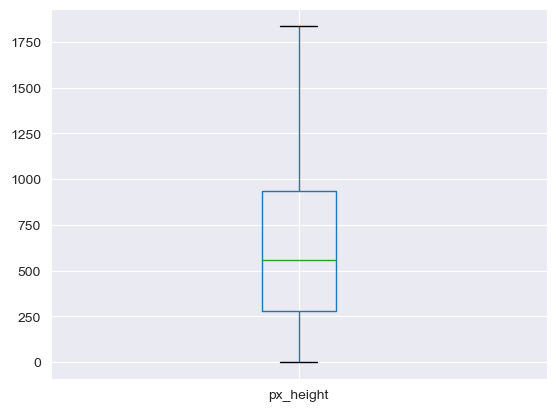

In [44]:
clean_df.boxplot(column='px_height')

#### Px_height after removing outliers

<Axes: >

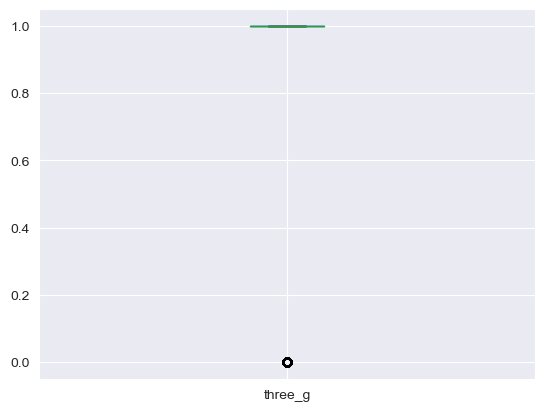

In [45]:
#plotting boxplot for three_g
clean_df.boxplot(column='three_g')

#### since three_g is a categorical variable, we shall keep the same

<Axes: xlabel='three_g', ylabel='count'>

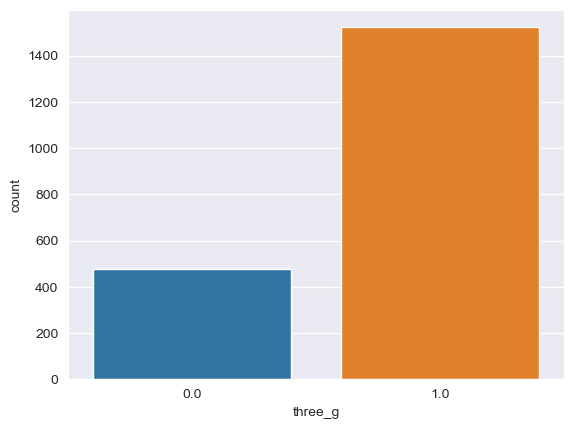

In [46]:
#countplot for three_g
sns.countplot(x='three_g',data=clean_data)

#### As there are maximum number of mobile devices supporting three_g compared to the devices which doesn't support three_g. It has detected devices which does not support three_g as outliers. Which cannot be considered to remove outliers.

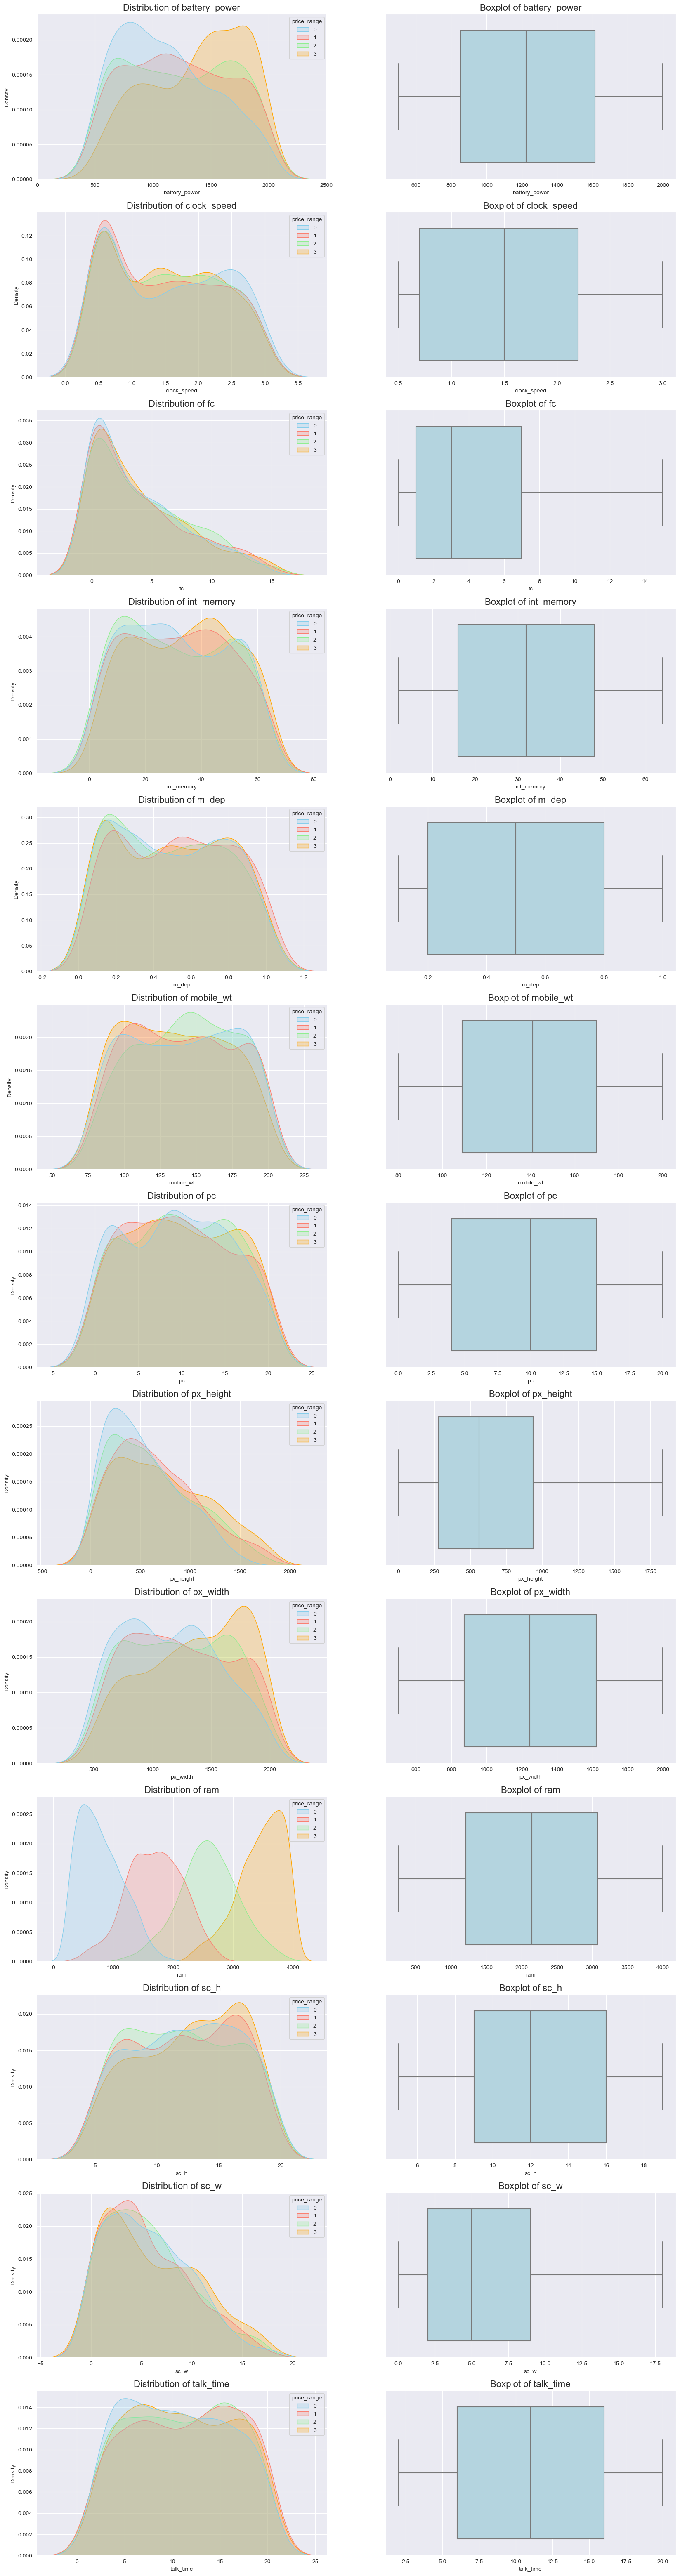

In [47]:
#### Define colors for KDE plots and boxplots
kde_palette = ['skyblue', 'salmon', 'lightgreen', 'orange']
box_palette = ['lightblue', 'lightcoral', 'lightgreen', 'gold']

# Create subplots
fig, axes = plt.subplots(13, 2, figsize=(20, 80))

# Set style
sns.set_style('darkgrid')

# Initialize index for subplot rows
idx = 0

# Iterate over numerical columns
for col in numerical_columns:
    # KDE plot
    sns.kdeplot(data=clean_df, x=col, hue='price_range', palette=kde_palette,
                fill=True, ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    
    # Boxplot
    sns.boxplot(data=clean_df, x=col, palette=box_palette, orient='h',
                ax=axes[idx][1]).set_title(f'Boxplot of {col}', fontsize='16')
    
    # Increment index
    idx += 1

# Show plot
plt.show()


<Axes: >

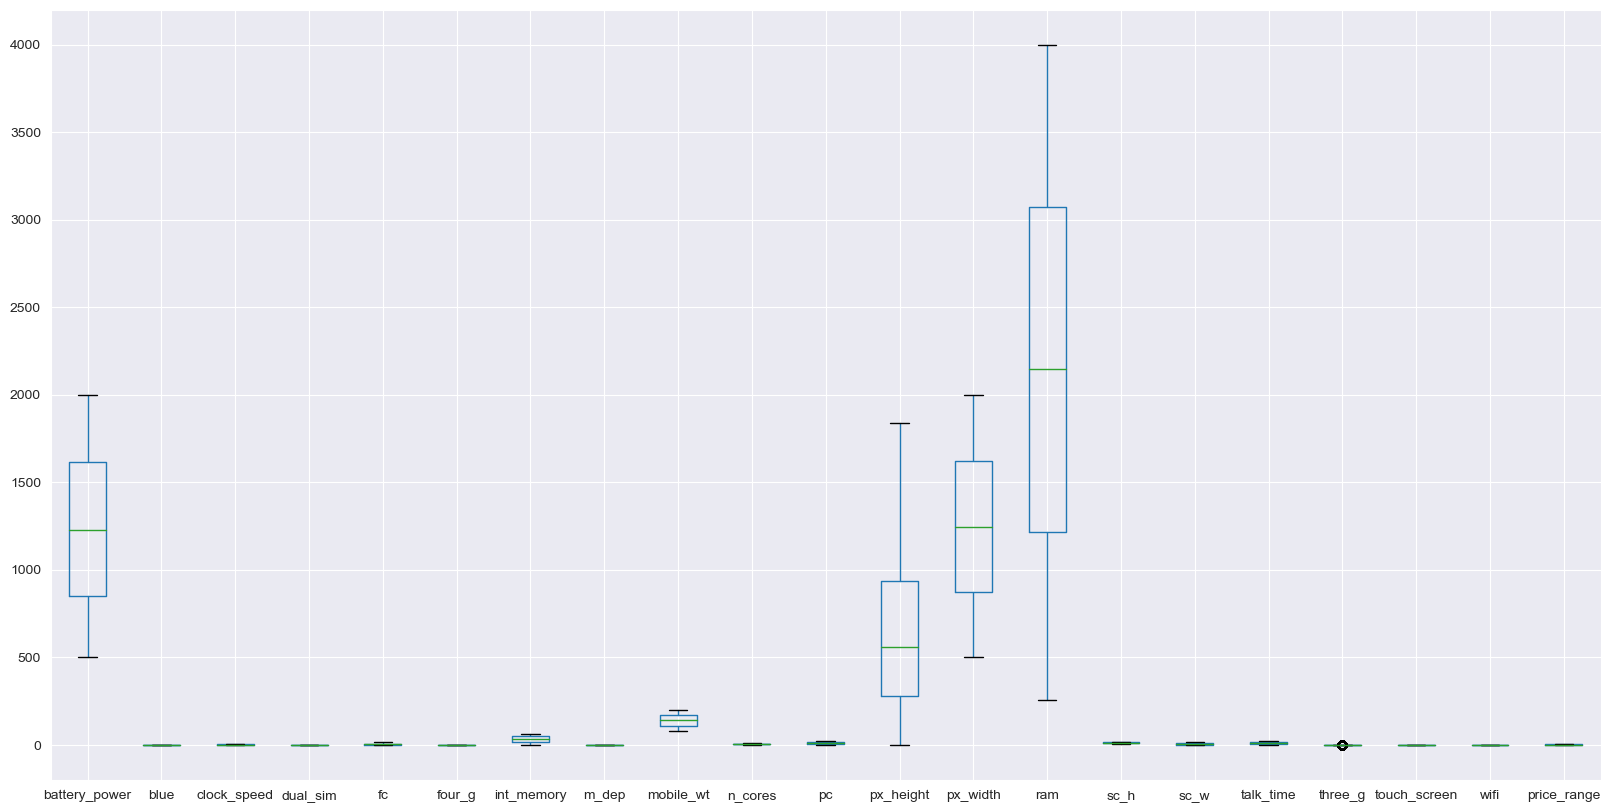

In [48]:
# Plot boxplot to check for outliers
plt.figure(figsize=(20,10))
clean_df.boxplot()

#### Now that we have removed all the unneccessary outliers from the dataset, let us check the correlation of variables.

### Correlation

In [49]:
#let us check for correlation between different columns
clean_df.corr(numeric_only=True)

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.007576     0.010369 -0.039711  0.026419   
blue                0.007576  1.000000     0.025953  0.042809  0.008595   
clock_speed         0.010369  0.025953     1.000000 -0.003678 -0.012853   
dual_sim           -0.039711  0.042809    -0.003678  1.000000 -0.034811   
fc                  0.026419  0.008595    -0.012853 -0.034811  1.000000   
four_g              0.021614  0.015164    -0.038809  0.002907 -0.025739   
int_memory         -0.003462  0.033350     0.006010 -0.016914 -0.022806   
m_dep               0.032153  0.002915    -0.013184 -0.020159  0.007948   
mobile_wt          -0.000436 -0.011489     0.010561 -0.003556  0.018006   
n_cores            -0.023343  0.039115    -0.009935 -0.030685 -0.009998   
pc                  0.026352 -0.004935    -0.014314 -0.017520  0.627985   
px_height           0.013819 -0.002879    -0.009191 -0.015568 -0.026717   
px_width           -0.007474 -0.041775    -0.010859  0.019281 -0.008734   
ram                -0.001754  0.026803    -0.006469  0.041654  0.027947   
sc_h               -0.028864 -0.003418    -0.028812 -0.010706 -0.000573   
sc_w               -0.018154  0.005573    -0.008485 -0.021025  0.007642   
talk_time           0.047247  0.011965    -0.011243 -0.050405 -0.008563   
three_g             0.013987 -0.030224    -0.036785 -0.013350 -0.007203   
touch_screen       -0.008766  0.009800     0.023030 -0.011916 -0.014764   
wifi               -0.011725 -0.014907    -0.026433  0.025188 -0.007490   
price_range         0.199001  0.019509    -0.014812  0.019082  0.027556   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.021614   -0.003462  0.032153  -0.000436 -0.023343  ...   
blue           0.015164    0.033350  0.002915  -0.011489  0.039115  ...   
clock_speed   -0.038809    0.006010 -0.013184   0.010561 -0.009935  ...   
dual_sim       0.002907   -0.016914 -0.020159  -0.003556 -0.030685  ...   
fc            -0.025739   -0.022806  0.007948   0.018006 -0.009998  ...   
four_g         1.000000    0.011025  0.001073  -0.013065 -0.030191  ...   
int_memory     0.011025    1.000000  0.004438  -0.033751 -0.024918  ...   
m_dep          0.001073    0.004438  1.000000   0.018771 -0.004695  ...   
mobile_wt     -0.013065   -0.033751  0.018771   1.000000 -0.023332  ...   
n_cores       -0.030191   -0.024918 -0.004695  -0.023332  1.000000  ...   
pc            -0.009358   -0.026407  0.031370   0.016844  0.002533  ...   
px_height     -0.027227    0.007807  0.020583   0.000727 -0.002228  ...   
px_width       0.004965   -0.012880  0.020489   0.000011  0.027092  ...   
ram            0.010071    0.036847 -0.014315  -0.004194  0.007204  ...   
sc_h           0.022747    0.041843 -0.021751  -0.030563  0.002021  ...   
sc_w           0.039626    0.015052 -0.019466  -0.018667  0.028494  ...   
talk_time     -0.047991   -0.008455  0.019165   0.011551  0.011681  ...   
three_g        0.583839   -0.008982 -0.011683   0.005834 -0.014624  ...   
touch_screen   0.021954   -0.030334 -0.005392  -0.014441  0.026177  ...   
wifi          -0.027286    0.013127 -0.031396  -0.001340 -0.009345  ...   
price_range    0.018652    0.045705 -0.005242  -0.031545  0.009610  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.013819 -0.007474 -0.001754 -0.028864 -0.018154   0.047247   
blue           -0.002879 -0.041775  0.026803 -0.003418  0.005573   0.011965   
clock_speed    -0.009191 -0.010859 -0.006469 -0.028812 -0.008485  -0.011243   
dual_sim       -0.015568  0.019281  0.041654 -0.010706 -0.021025  -0.050405   
fc             -0.026717 -0.008734  0.027947 -0.000573  0.007642  -0.008563   
four_g         -0.027227  0.004965  0.010071  0.022747  0.039626  -0.047991   
int_memory      0.007807 -0.012880  0.036847  0.041843  0.015052  -0.008455   
m_dep           0.020583  0.020489 -0.014315 -0.021751 -0.019466   0.019165   
mo

#### Correlations among columns using heatmap

<Axes: >

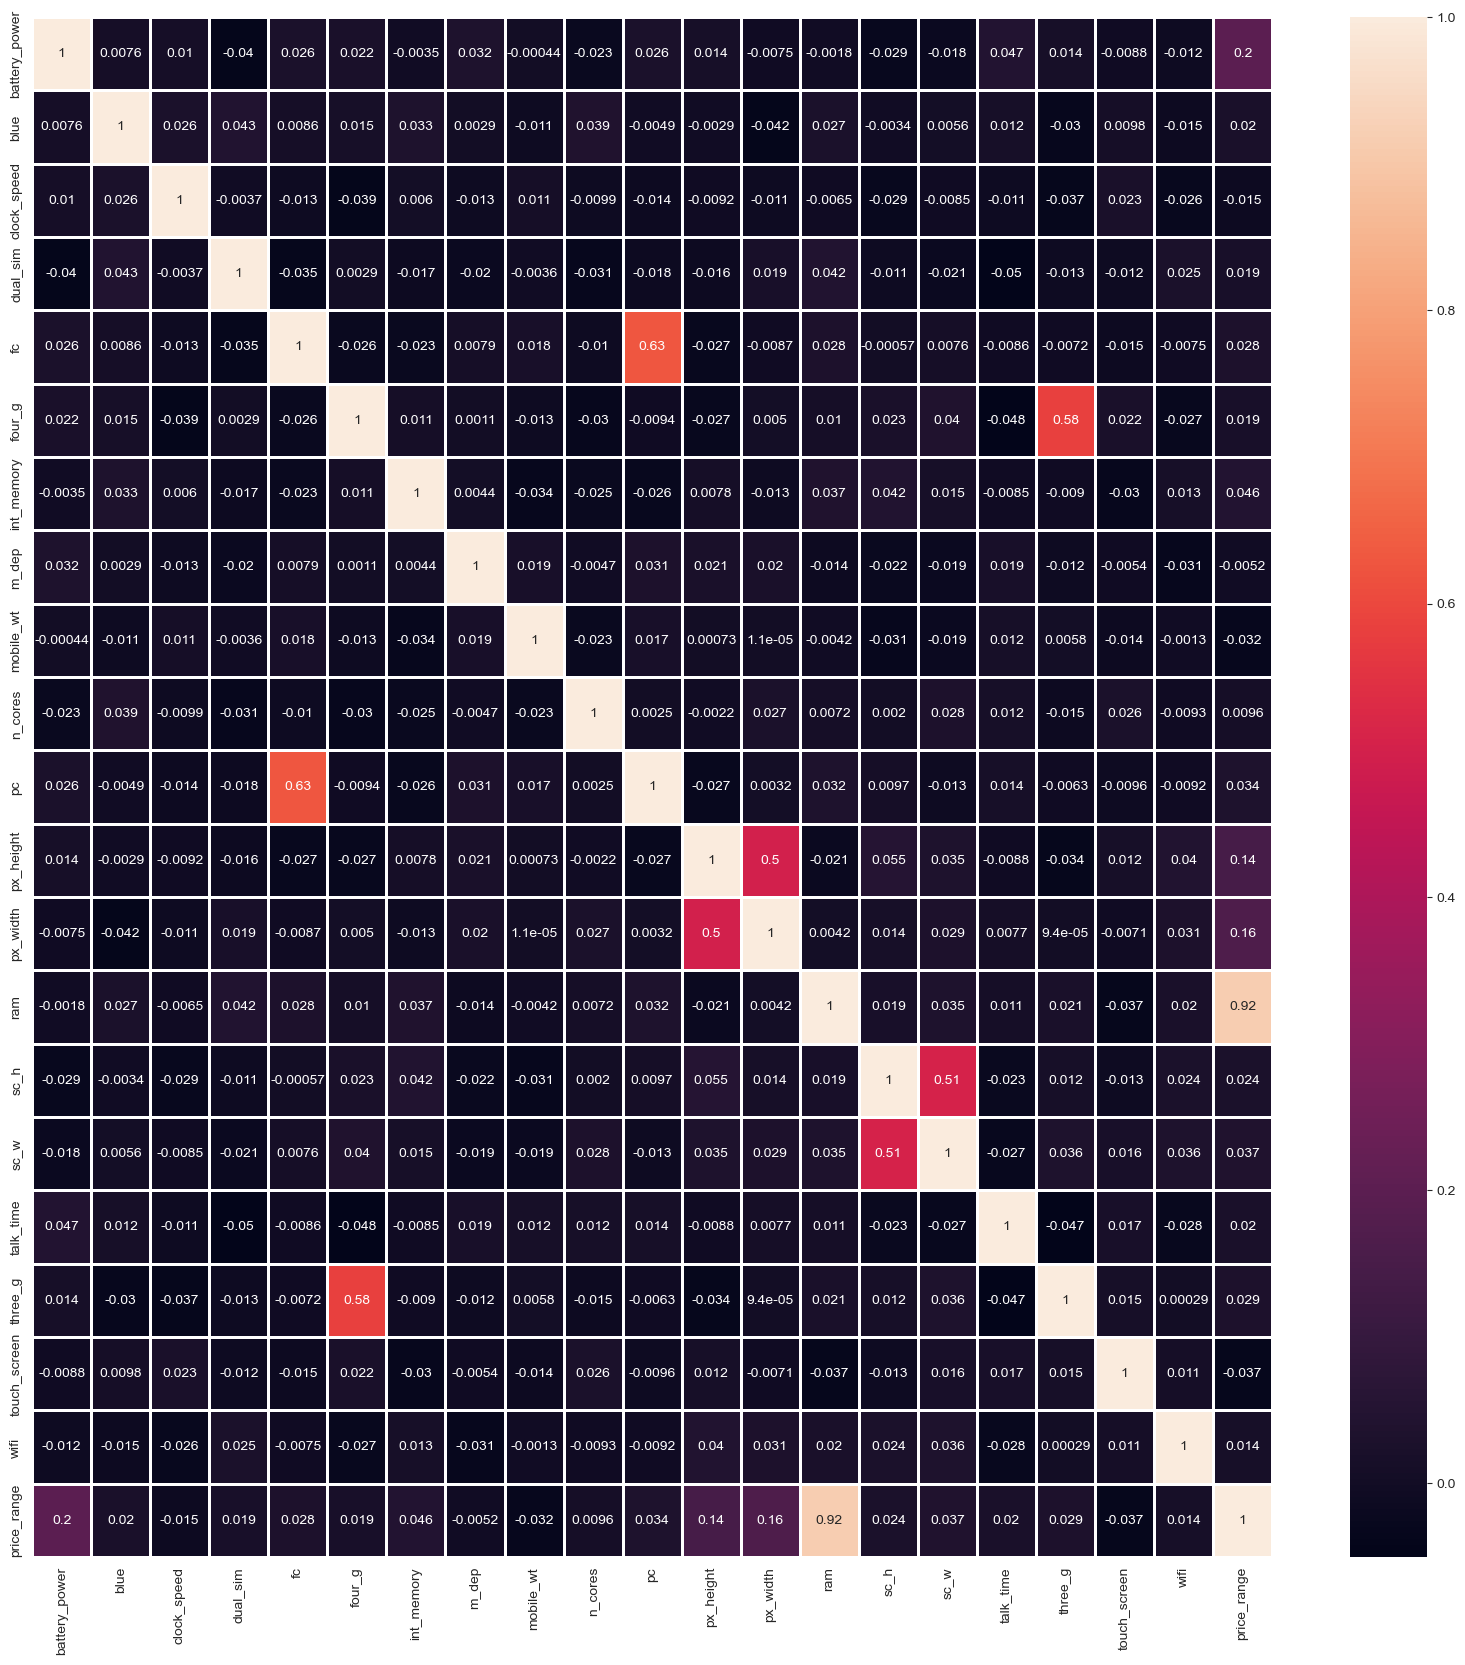

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, linewidth=1)

#### The highest correlation with 'price_range' is observed for 'ram' with a correlation coefficient of approximately 0.92. This indicates a strong positive correlation, suggesting that as the RAM of a mobile phone increases, the price range tends to increase.
#### Overall, RAM appears to have the strongest correlation with the price range, followed by battery power, pixel width and height. These insights can help in understanding which features might be more influential in determining the price range of mobile phones.

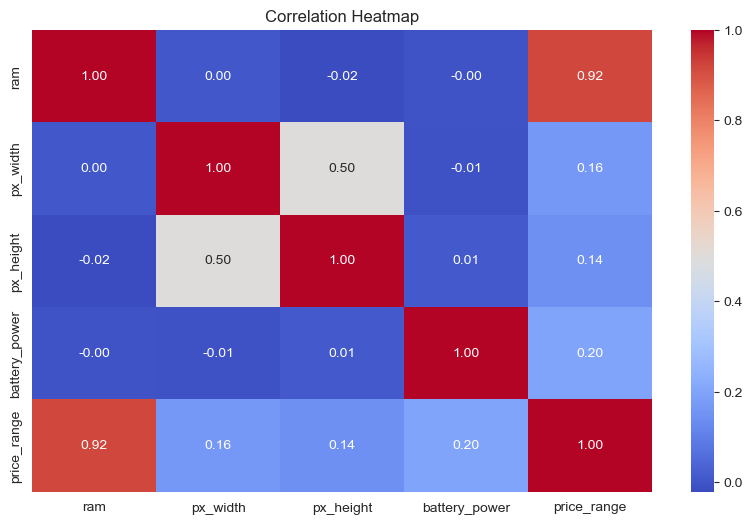

In [51]:
# Calculate correlation matrix
corr_matrix = clean_df[['ram', 'px_width', 'px_height', 'battery_power', 'price_range']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

<Axes: title={'center': 'Feature-correlation (pearson)'}>

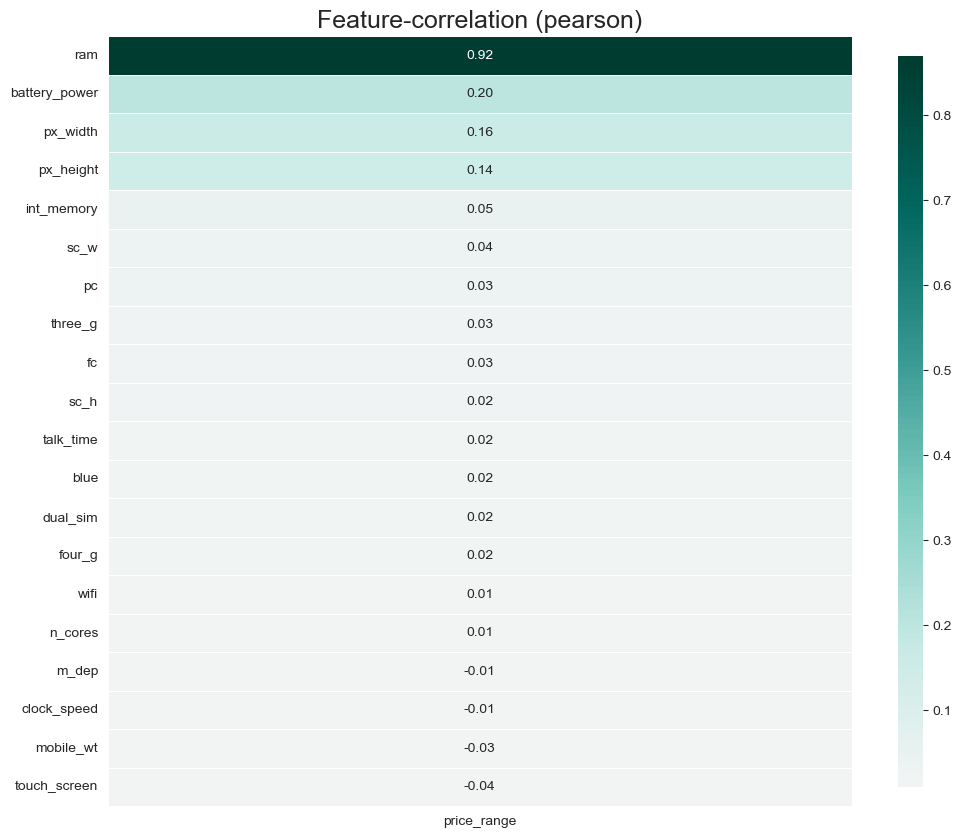

In [52]:
from warnings import  filterwarnings
filterwarnings('ignore')
import klib
klib.corr_plot(clean_df, target='price_range')

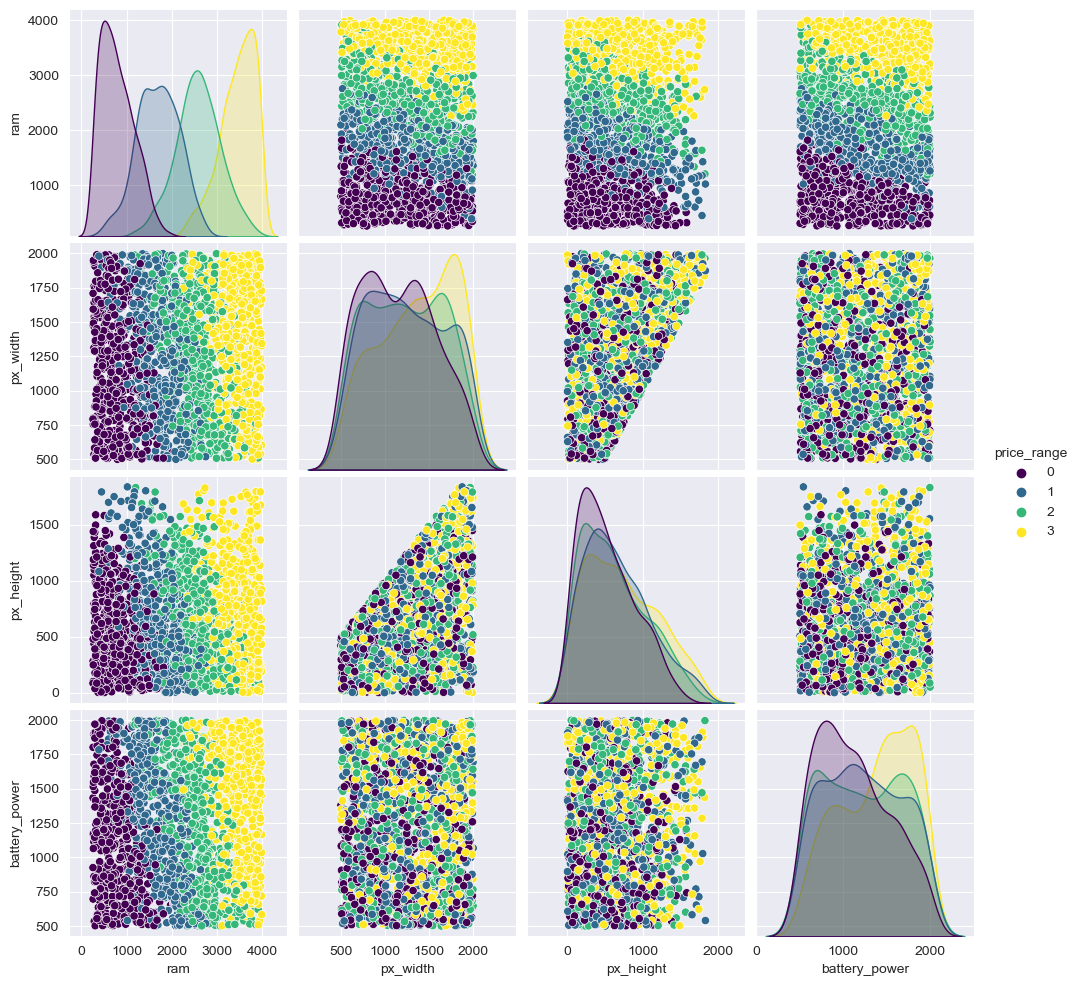

In [53]:
sns.pairplot(clean_df, vars=['ram', 'px_width', 'px_height', 'battery_power'], hue='price_range', palette='viridis')
plt.show()

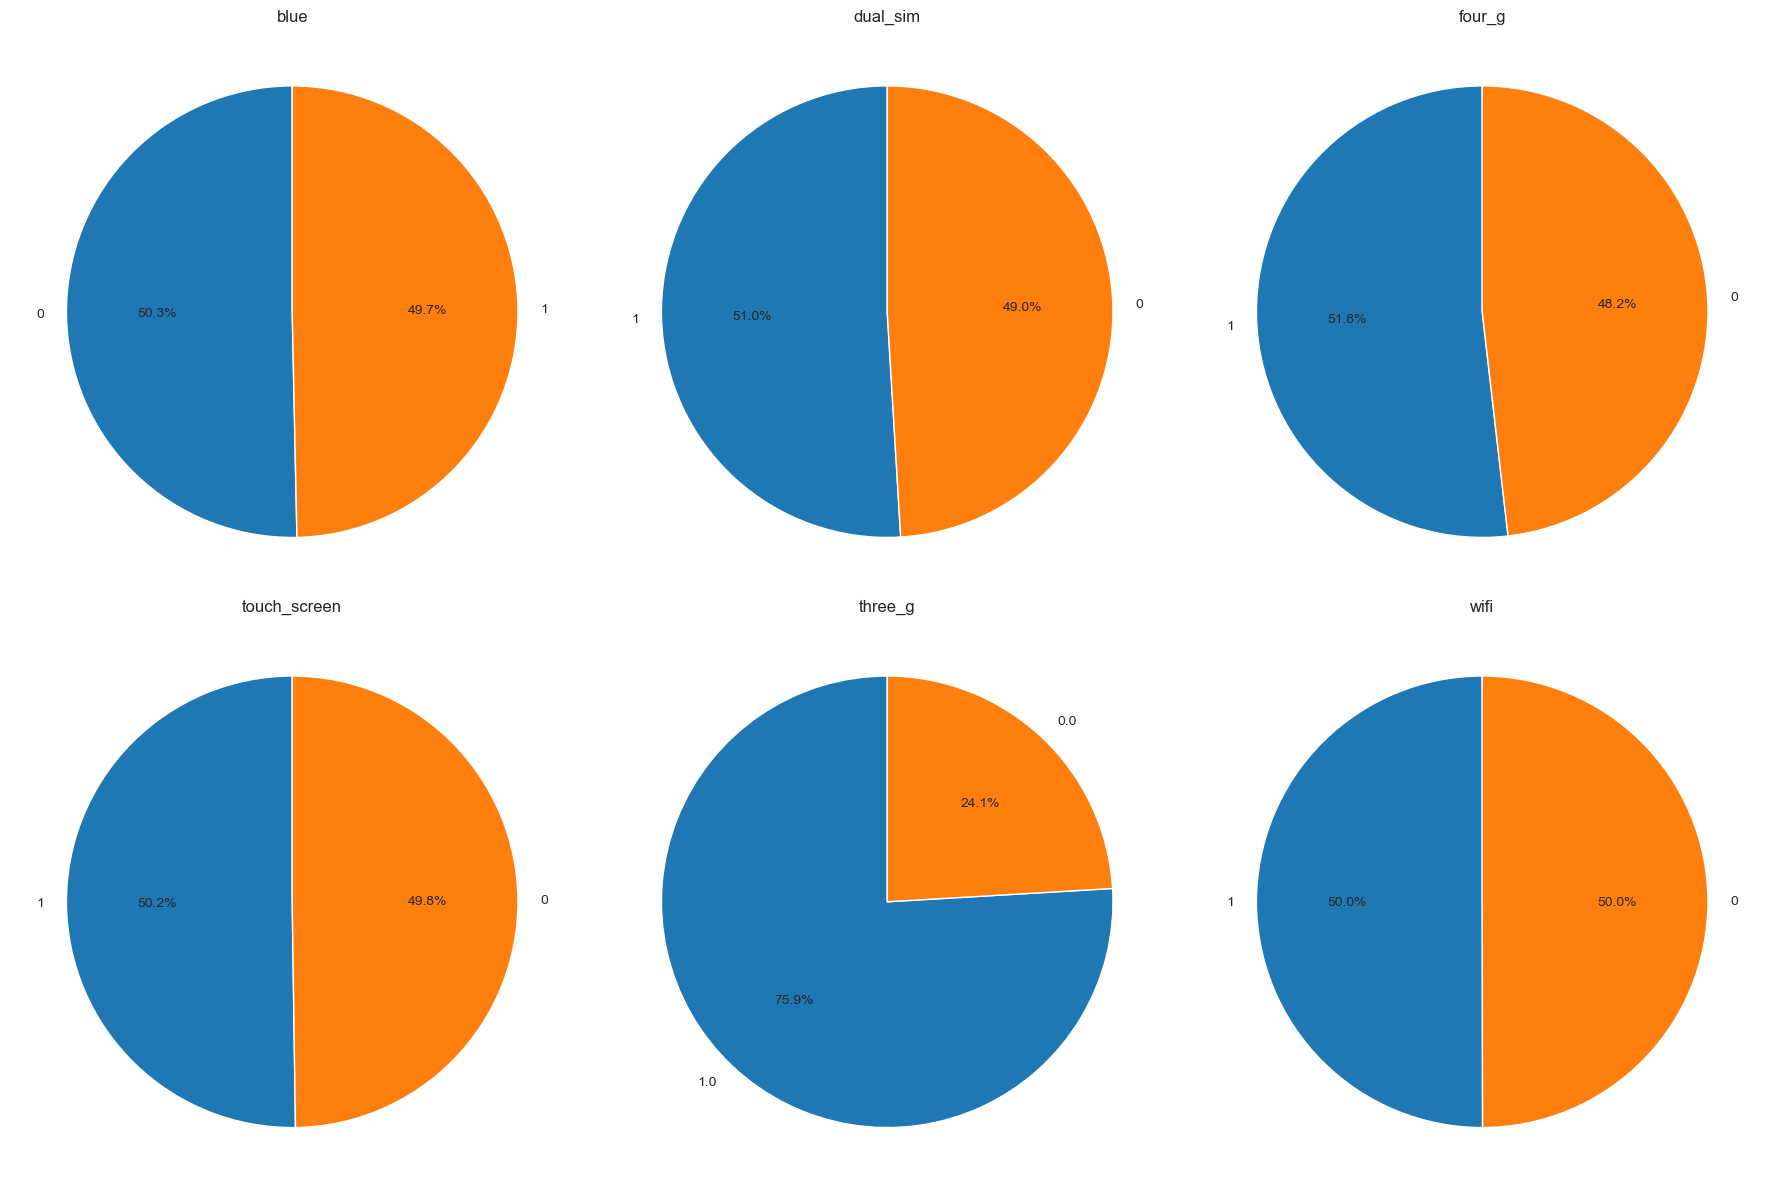

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create pie chart
for i, column in enumerate(['blue', 'dual_sim', 'four_g', 'touch_screen', 'three_g', 'wifi']):
    # Count the occurrences of each category
    counts = clean_df[column].value_counts()
    # Plot pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

The pie_charts provide insights into the distribution of these features across different mobile devices.

Bluetooth Distribution:
49.7% of the mobile devices in the data set do not support Bluetooth.
50.3% of the mobile devices in the data set support Bluetooth.
Dual SIM Distribution:

Sim capability:
49.0% of the mobile devices in the data set do not have dual SIM capability.
51.0% of the mobile devices in the data set have dual SIM capability.

4G Distribution:
48.2% of the mobile devices in the data set do not have 4G connectivity.
51.8% of the mobile devices in the data set have 4G connectivity.

Touch Screen Distribution:
50.2% of the mobile devices in the data set have touch screen functionality.
49.8% of the mobile devices in the data set do not have touch screen functionality.

3G Distribution:
24.1% of the mobile devices in the data set do not have 3G connectivity.
75.9% of the mobile devices in the data set have 3G connectivity.


Wi-Fi Distribution:
50.0% of the mobile devices in the data set do not support Wi-Fi.
50.0% of the mobile devices in the data set support Wi-Fi.

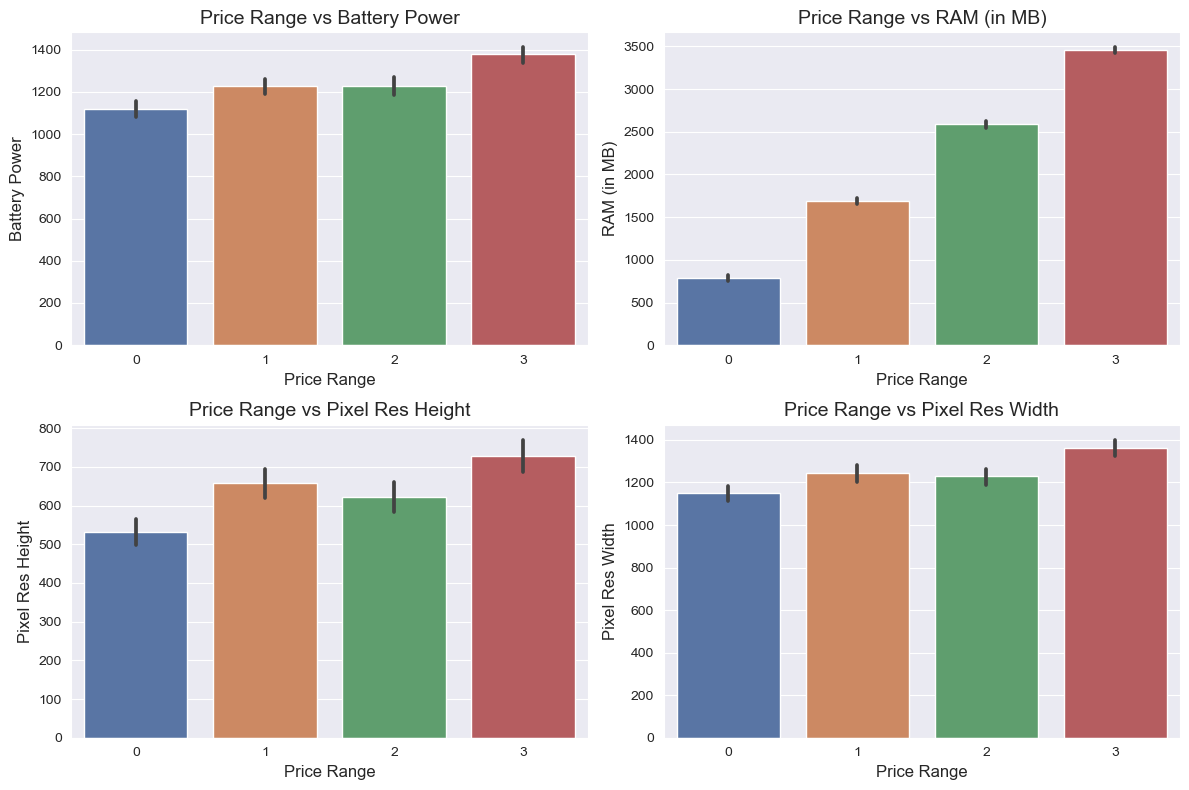

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x=clean_df['price_range'], y=clean_df['battery_power'], palette="deep", ax=axes[0, 0])
sns.barplot(x=clean_df['price_range'], y=clean_df['ram'], palette="deep", ax=axes[0, 1])
sns.barplot(x=clean_df['price_range'], y=clean_df['px_height'], palette="deep", ax=axes[1, 0])
sns.barplot(x=clean_df['price_range'], y=clean_df['px_width'], palette="deep", ax=axes[1, 1])

axes[0, 0].set_title('Price Range vs Battery Power', size=14)
axes[0, 0].set_xlabel('Price Range', size=12)
axes[0, 0].set_ylabel('Battery Power', size=12)

axes[0, 1].set_title('Price Range vs RAM (in MB)', size=14)
axes[0, 1].set_xlabel('Price Range', size=12)
axes[0, 1].set_ylabel('RAM (in MB)', size=12)

axes[1, 0].set_title('Price Range vs Pixel Res Height', size=14)
axes[1, 0].set_xlabel('Price Range', size=12)
axes[1, 0].set_ylabel('Pixel Res Height', size=12)

axes[1, 1].set_title('Price Range vs Pixel Res Width', size=14)
axes[1, 1].set_xlabel('Price Range', size=12)
axes[1, 1].set_ylabel('Pixel Res Width', size=12)

plt.tight_layout()
plt.show()

These bar plots show the relationship between the Price Range of the mobile phones and their different significant features.

Price Range vs Battery Power: From the bar plot, we can observe how the average battery power varies across different price ranges. With Price the battery power also increases, but the for the price range of 1 and 2 the Batteries seem to have the same Power.

Price Range vs RAM (in MB): It visualizes how the average RAM size differs among various price ranges and the graph clearly shows how with ram size increasing the price range also grows subsequently.

Price Range vs Pixel Resolution Height: This information helps in understanding the impact of price range on the display quality, particularly in terms of vertical resolution which seems to be not following a particular order here.

Price Range vs Pixel Resolution Width: This plot provides insights into the relationship between the price of a mobile phone and its display quality in terms of horizontal resolution, again which seems to be not following a particular order.

### Logistic Regression

#### Split the dataset

In [56]:
#testing data containing 80% of the entire data;
train, test = train_test_split(clean_df, test_size=0.2, random_state=42)
print("The Shape of training set: ", train.shape)
print("The Shape of testing set: ",test.shape)

The Shape of training set:  (1556, 21)
The Shape of testing set:  (389, 21)


In [57]:
# Step 1: Split the data
X = clean_df[['ram', 'px_width','px_height', 'battery_power']]
y = clean_df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The Shape of training set: ", train.shape)
print("The Shape of testing set: ",test.shape)

# Step 2: Train the logistic regression model
model = LogisticRegression(max_iter=800)
model.fit(X_train, y_train)

# Step 3: Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


The Shape of training set:  (1556, 21)
The Shape of testing set:  (389, 21)
Training Accuracy: 0.9582262210796915
Test Accuracy: 0.9640102827763496


#### The training accuracy is approximately 95.82%, while the testing accuracy is approximately 96.40%.
#### Both training and testing accuracies are high, which indicates that the model performs well on both seen and unseen data.

#### The high accuracy on both training and testing sets suggests that the selected features ram, px_width, px_height, battery_power are informative and have a strong correlation with the target variable price_range. These features capture essential characteristics of mobile phones that influence their price range, such as memory capacity, display resolution, and battery power.

### Building KNN Classification Model:

Train a KNN model to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. Calculate the accuracy of your model. (You are required to report the accuracy from both training set and test set.)

Tune the hyper-parameter K in KNN (Hints: GridsearchCV), visualize the results, and explain how K influences the prediction performance.

Ad-hoc KNN Model: Training Accuracy: 0.9421593830334191
Ad-hoc KNN Model: Test Accuracy: 0.9383033419023136

Best K found by GridSearchCV: 11

KNN Model with Tuned K:
Training Accuracy: 0.9466580976863753
Test Accuracy: 0.9434447300771208


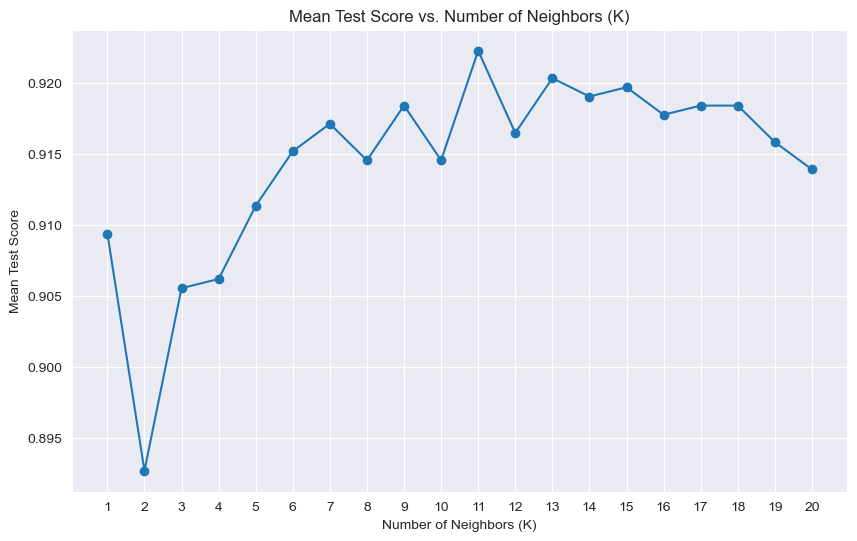

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Step 1: Train a KNN model with ad-hoc K
knn_adhoc = KNeighborsClassifier(n_neighbors=5)  # Using K=5 as an ad-hoc value
knn_adhoc.fit(X_train, y_train)

# Calculate accuracy for ad-hoc K
train_accuracy_adhoc = accuracy_score(y_train, knn_adhoc.predict(X_train))
test_accuracy_adhoc = accuracy_score(y_test, knn_adhoc.predict(X_test))


print("Ad-hoc KNN Model: Training Accuracy:", train_accuracy_adhoc)
print("Ad-hoc KNN Model: Test Accuracy:", test_accuracy_adhoc)

# Step 2: Tune the hyperparameter K using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}  # Try values of K from 1 to 20
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(knn_grid, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best value of K
best_of_k = grid_search.best_params_['n_neighbors']
print("\nBest K found by GridSearchCV:", best_of_k)

# Calculate accuracy for best K
train_accuracy_best_k = accuracy_score(y_train, grid_search.predict(X_train))
test_accuracy_best_k = accuracy_score(y_test, grid_search.predict(X_test))

print("\nKNN Model with Tuned K:")
print("Training Accuracy:", train_accuracy_best_k)
print("Test Accuracy:", test_accuracy_best_k)

# Step 3: Visualize how K influences prediction performance
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o')
plt.title('Mean Test Score vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()


#### KNN model is trained to predict the 'price_range' of mobile phones based on features such as 'ram', 'px_width', 'px_height', and 'battery_power'. The impact of the value of K on prediction performance is explored through an ad-hoc KNN model and a tuned KNN model using GridSearchCV. 

#### Ad-hoc KNN Model: With an ad-hoc value of K=5, the training accuracy is approximately 94.22%, and the test accuracy is approximately 93.83%.A moderate value of K is chosen arbitrarily, resulting in reasonably good performance on both training and test sets.

#### Tuned KNN Model: After tuning the hyperparameter K using GridSearchCV, the best value of K is determined to be 11. The training accuracy of the tuned model is approximately 94.67%, and the test accuracy is approximately 94.34%. By selecting the optimal value of K, the model achieves slightly better performance compared to the ad-hoc model.

#### Influence of K: The plot "Mean Test Score vs. Number of Neighbors (K)" shows how the mean test score changes with different values of K.
#### The plot shows a trend where the mean test score initially increases with K, reaches a peak, and then gradually decreases. This demonstrates the bias-variance tradeoff: smaller values of K lead to higher variance and lower bias, while larger values of K lead to higher bias and lower variance.

#### Insights from this: The choice of K significantly impacts the model's performance.
#### Selecting an appropriate value of K is crucial for achieving the best predictive performance. In this example, tuning K through GridSearchCV helps optimize the model's performance, leading to improved accuracy on unseen data.
#### Overall, the example highlights the importance of selecting an optimal value of K in KNN to achieve the best predictive performance and illustrates how hyperparameter tuning can enhance model accuracy.